# **MNIST**

In [131]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow.compat.v2 as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical as tcg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [132]:
(xtr,ytr),(xte,yte)=mnist.load_data()

In [133]:
xtr.shape

(60000, 28, 28)

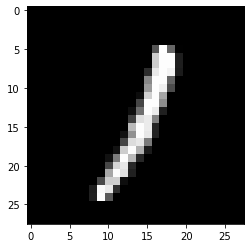

In [134]:
plt.imshow(xtr[99], cmap='gray')

In [135]:
ytr[99]

1

In [136]:
# xte=xte.reshape(xte.shape[0],xte.shape[1],xte.shape[2],1).astype('float32')/255
xtr=xtr.reshape(xtr.shape[0],xtr.shape[1],xtr.shape[2],1).astype('float32')/255

In [137]:
ytr=tcg(ytr)
yte=tcg(yte)

In [138]:
model = Sequential([
  Flatten(input_shape=(28, 28, 1)),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [139]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [140]:
history = model.fit(xtr,ytr, validation_data=(xte,yte),epochs=13, batch_size=256)

Epoch 1/13
235/235 [==============================] - 2s 10ms/step - loss: 0.3432 - accuracy: 0.8996 - val_loss: 20.4474 - val_accuracy: 0.9562
Epoch 2/13
235/235 [==============================] - 2s 9ms/step - loss: 0.1234 - accuracy: 0.9635 - val_loss: 17.1065 - val_accuracy: 0.9657
Epoch 3/13
235/235 [==============================] - 2s 9ms/step - loss: 0.0802 - accuracy: 0.9755 - val_loss: 13.0988 - val_accuracy: 0.9753
Epoch 4/13
235/235 [==============================] - 2s 9ms/step - loss: 0.0574 - accuracy: 0.9826 - val_loss: 13.7645 - val_accuracy: 0.9760
Epoch 5/13
235/235 [==============================] - 2s 9ms/step - loss: 0.0443 - accuracy: 0.9866 - val_loss: 14.9327 - val_accuracy: 0.9727
Epoch 6/13
235/235 [==============================] - 2s 9ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 14.4904 - val_accuracy: 0.9775
Epoch 7/13
235/235 [==============================] - 2s 9ms/step - loss: 0.0248 - accuracy: 0.9924 - val_loss: 14.5349 - val_accuracy: 0.978

In [141]:
model.evaluate(xtr,ytr)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0076 - accuracy: 0.9977


[0.00761139951646328, 0.9976999759674072]

In [142]:
score = model.evaluate(xte,yte)

313/313 [==============================] - 0s 1ms/step - loss: 19.9991 - accuracy: 0.9779


In [143]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 19.99909782409668
Test accuracy: 0.9779000282287598


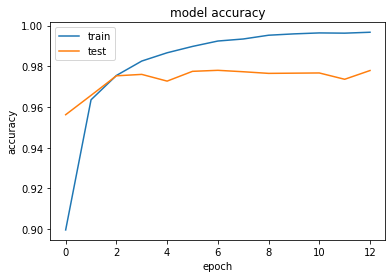

In [144]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

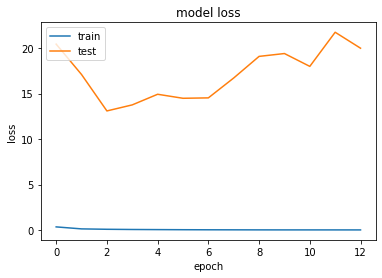

In [145]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [146]:
model.save("mnist.hdf5")

In [147]:
model.load_weights("mnist.hdf5")

In [148]:
loaded_model = tf.keras.models.load_model("mnist.hdf5")

loaded_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [149]:
xte.shape

(10000, 28, 28)

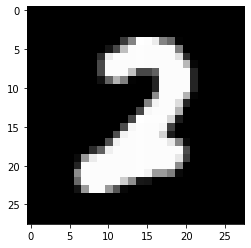

In [150]:
plt.imshow(xte[199], cmap='gray')

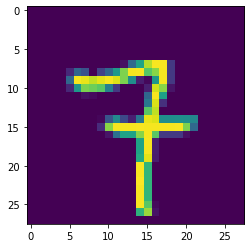

In [151]:
plt.imshow(xte[832]) 


In [152]:
print("Predicted sign: "+ str( 
        loaded_model.predict(xte[832].reshape(1, 28, 28, 1))))

print('---------------------------------------------------------------------------')


Predicted sign: [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
---------------------------------------------------------------------------


In [153]:
print("Predicted Sign" + str(loaded_model.predict_classes(xte[832].reshape(1, 28, 28, 1))))

Predicted Sign[7]


In [154]:
from tensorflow.keras.models import load_model

import cv2

import numpy as np

final_model = tf.keras.models.load_model("mnist.hdf5")

img = cv2.imread('ss.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

img = img / 255

img = cv2.resize(img,(28,28))

img = np.reshape(img,[1,28, 28,1])

classes = final_model.predict_classes(img)

print(classes)

[3]
